# SMS Spam Classifier using NLP

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', None)



In [1]:
sms = pd.read_csv('C:/Users/ishan/Documents/Data Science Projects/Data Science/Natural Language Processing/SpamClassifier-master/SMSSpamCollection', sep = '\t',names=["label", "message"])

<IPython.core.display.Javascript object>

In [2]:
sms.columns

Index(['label', 'message'], dtype='object')

In [5]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [9]:
sms.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
import re
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


corpus =[]
for i in range(len(sms)):
    review  = re.sub('[^a-zA-Z]',' ',sms['message'][i])
    review =review.lower()
    review = review.split()
    review = [stemmer.stem(word) for word in review if word not in set(stopwords.words('english'))]
    # We can use lemmatizer.lemmatize or stemmer.stem in above line, depending on what you want 
    #review = ' '.join(review)    # Comment out only if you are using word2vec, otherwise uncomment it
    corpus.append(review)



In [7]:
corpus[0]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [63]:
from sklearn.feature_extraction.text import CountVectorizer  # For creating Bag of Words
cv = CountVectorizer(max_features= 10000,ngram_range=(1,3))    
#from sklearn.feature_extraction.text import TfidfVectorizer  # For creating Bag of Words
#cv = TfidfVectorizer(max_features=1500)

x = cv.fit_transform(corpus).toarray()

In [64]:
x.shape

(5572, 10000)

In [74]:
cv.get_feature_names()

['aah',
 'aathi',
 'aathi dear',
 'aathi love',
 'aathi love lot',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abl come',
 'abl deliv',
 'abl deliv basic',
 'abl get',
 'abl pay',
 'abl pay charg',
 'absolutli',
 'absolutli fine',
 'abt',
 'abt alreadi',
 'abt tht',
 'abt ur',
 'abta',
 'abta complimentari',
 'abta complimentari tenerif',
 'aburo',
 'aburo enjoy',
 'abus',
 'ac',
 'ac nat',
 'ac nat stop',
 'academ',
 'acc',
 'accept',
 'accept brother',
 'accept brother sister',
 'accept day',
 'accept day accept',
 'access',
 'access number',
 'access number prepay',
 'accid',
 'accid claim',
 'accid claim free',
 'accident',
 'accordingli',
 'account',
 'account detail',
 'account lt',
 'account lt gt',
 'account statement',
 'account statement show',
 'ach',
 'acl',
 'acl pm',
 'aco',
 'aco entri',
 'aco entri claim',
 'across',
 'across sea',
 'act',
 'action',
 'action www',
 'action www movietrivia',
 'activ',
 'activ free',
 'activ free text',
 'activ play',
 'activ play drea

In [24]:
y = pd.get_dummies(sms['label'])

In [25]:
y = y['spam'].values

In [14]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [66]:
from sklearn.naive_bayes import MultinomialNB
model =  MultinomialNB(alpha= 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
matrix  = confusion_matrix(y_pred,y_test)


In [68]:
matrix

array([[954,  16],
       [  3, 142]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
accuracy

0.9829596412556054

In [15]:
#array([[956,   7],  #stemmer countvectorizer
 #      [ 10, 142]])
    
#array([[953,   7],     #lemmatizer countvectorizer
 #      [ 13, 142]]    
      
#array([[962,  18],       #lemmatizer tfidvectorizer
 #      [  4, 131]]   
    
#array([[964,  18],       #stemmer tfidvectorizer
 #      [  2, 131]]    

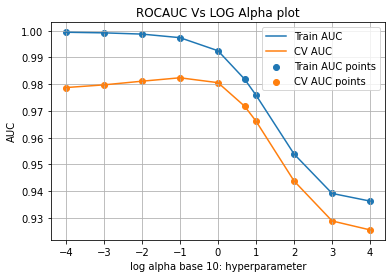

{'alpha': 0.1}
0.9824128636835716
best alpha log value
-1.0


In [70]:
from sklearn.model_selection import GridSearchCV
import math
import numpy as np
import matplotlib.pyplot as plt

# Taking equal prior probability values

neigh = MultinomialNB()#Taking Model Multinomial Naive Bayes


alphas=np.array([0.0001,0.001,0.01,0.1,1,5,10,100,1000,10000]) # Different alpha values
tuned_parameters = {'alpha' : alphas} # alpha values in a dictionary


clf = GridSearchCV(neigh, tuned_parameters, cv=5, scoring='roc_auc',return_train_score='true') 
clf.fit(X_train,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)#please check the output of cv_results_
#  gridsearchcv execution will understand. concepts required KFold cross validation
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']

cv_auc = results['mean_test_score'] 

k =  results['param_alpha']

# alpha value is taken as log alpha value
alpha1=[]
for i in range(0,len(k),1):
   l=math.log10(k[i])
   alpha1.append(l)
alpha1.sort()
#print(alpha1)

plt.plot(alpha1, train_auc, label='Train AUC')# to connect lines to auc points


plt.plot(alpha1, cv_auc, label='CV AUC')



plt.scatter(alpha1, train_auc, label='Train AUC points')
plt.scatter(alpha1, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha base 10: hyperparameter")
plt.ylabel("AUC")
plt.title("ROCAUC Vs LOG Alpha plot")
plt.grid()
plt.show()


print(clf.best_params_)# pick the best alpha value
print(clf.best_score_)
print("best alpha log value")
a=math.log10(clf.best_params_.get('alpha'))
print(a)



## Passive Aggresive Classifier

In [145]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()


In [146]:
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
score =accuracy_score(y_test,y_pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, y_pred)
cm

accuracy:   0.982


array([[957,   0],
       [ 20, 138]], dtype=int64)

In [8]:
import gensim                                             #Can use this too
from gensim.models import Word2Vec

C:\Users\ishan\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [9]:
model = Word2Vec(corpus, min_count=1)

In [10]:
words = model.wv.key_to_index

In [11]:
words

{'u': 0,
 'call': 1,
 'go': 2,
 'get': 3,
 'ur': 4,
 'gt': 5,
 'lt': 6,
 'come': 7,
 'day': 8,
 'ok': 9,
 'free': 10,
 'know': 11,
 'love': 12,
 'like': 13,
 'time': 14,
 'good': 15,
 'want': 16,
 'got': 17,
 'text': 18,
 'send': 19,
 'txt': 20,
 'need': 21,
 'p': 22,
 'one': 23,
 'today': 24,
 'n': 25,
 'take': 26,
 'stop': 27,
 'see': 28,
 'r': 29,
 'home': 30,
 'think': 31,
 'repli': 32,
 'lor': 33,
 'k': 34,
 'sorri': 35,
 'still': 36,
 'tell': 37,
 'mobil': 38,
 'back': 39,
 'da': 40,
 'dont': 41,
 'make': 42,
 'phone': 43,
 'week': 44,
 'pleas': 45,
 'say': 46,
 'hi': 47,
 'new': 48,
 'work': 49,
 'pl': 50,
 'later': 51,
 'miss': 52,
 'hope': 53,
 'ask': 54,
 'co': 55,
 'msg': 56,
 'min': 57,
 'meet': 58,
 'c': 59,
 'messag': 60,
 'night': 61,
 'dear': 62,
 'happi': 63,
 'wait': 64,
 'well': 65,
 'give': 66,
 'thing': 67,
 'tri': 68,
 'great': 69,
 'much': 70,
 'claim': 71,
 'oh': 72,
 'wat': 73,
 'hey': 74,
 'number': 75,
 'b': 76,
 'thank': 77,
 'friend': 78,
 'ye': 79,
 'way':

In [15]:
model.wv.most_similar('phone',topn=5)

[('repli', 0.999710738658905),
 ('text', 0.9996644854545593),
 ('free', 0.9996569752693176),
 ('mobil', 0.9996234774589539),
 ('pleas', 0.999565601348877)]